Overall MAPE (all points): 0.22%
Average sample MAPE: 0.22%


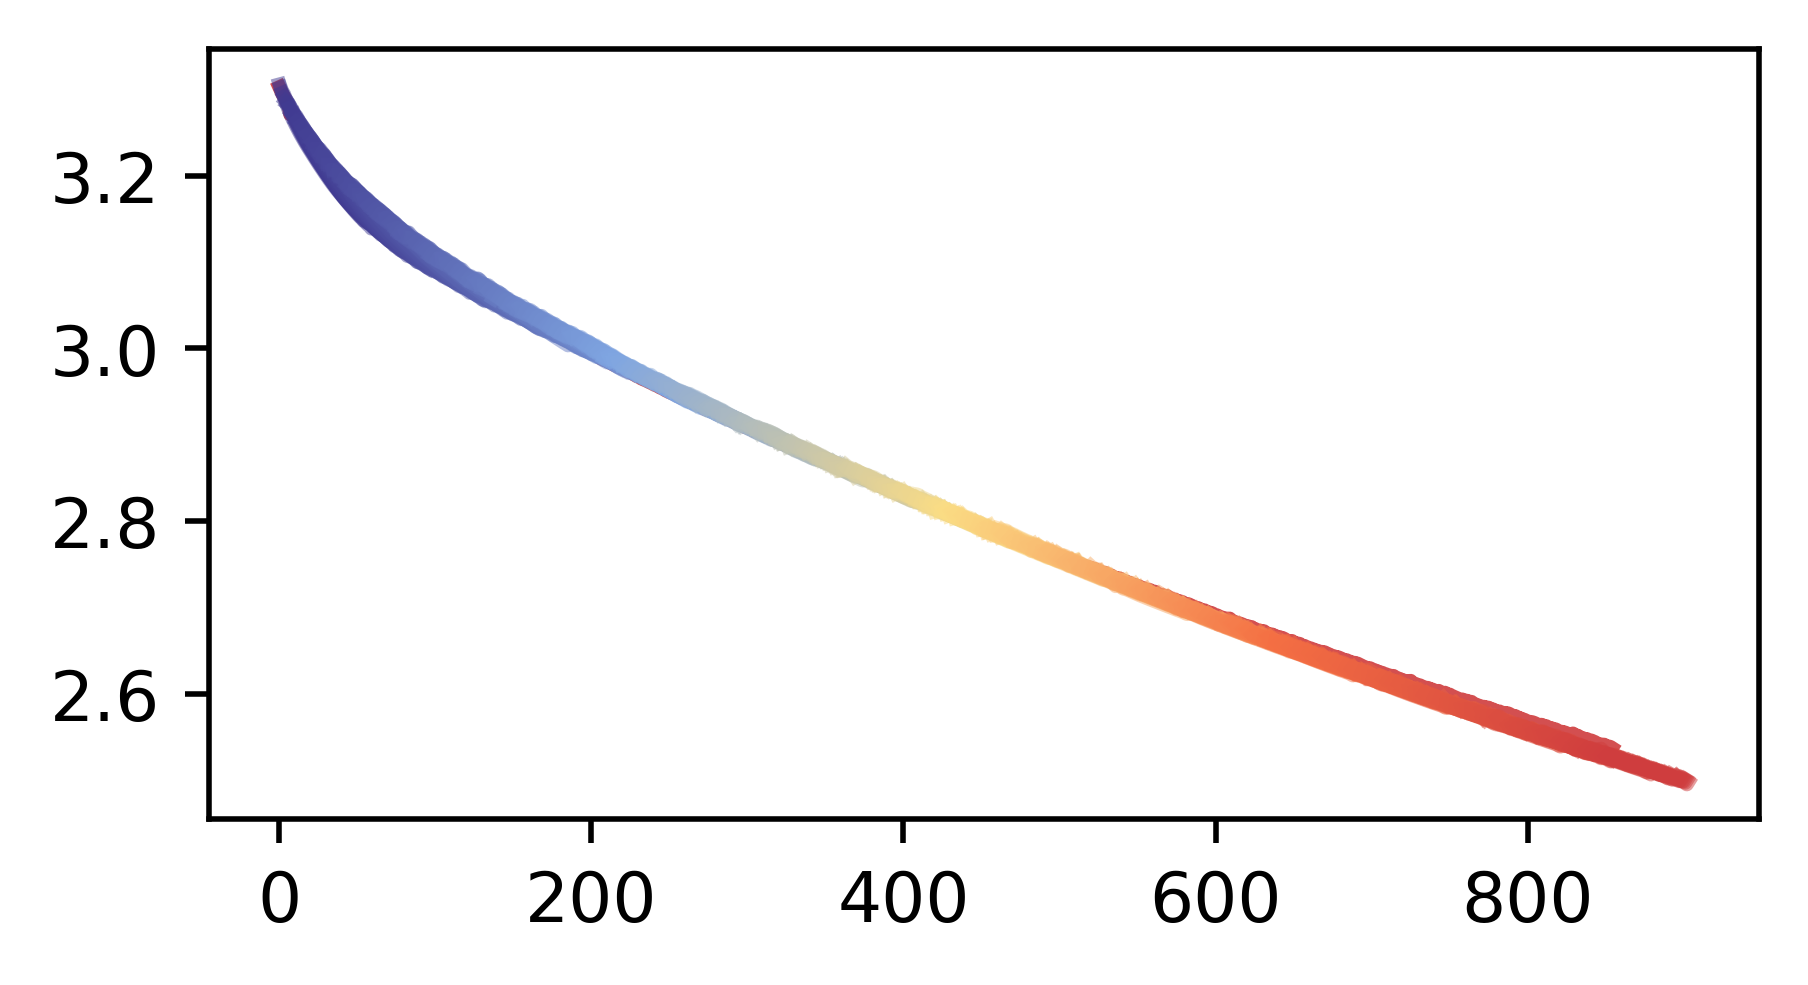

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LinearSegmentedColormap

true_values_path = 'checkpoint/IMOE/UL-NCM/CY45-05_1/IMOE_dsNCM_ex5_pl50_tk2_ep2000_dm0/true_values.npy'
pred_values_path_1 = 'checkpoint/IMOE/UL-NCM/CY45-05_1/IMOE_dsNCM_ex5_pl50_tk2_ep2000_dm0/pred_values.npy'
start_index = 1645
end_index = 2500

def calculate_mape(true, pred):
    true = np.asarray(true)
    pred = np.asarray(pred)
    mask = (true != 0) & (~np.isnan(true)) & (~np.isinf(true)) & (~np.isnan(pred)) & (~np.isinf(pred))
    true = true[mask]
    pred = pred[mask]
    if len(true) == 0:
        return np.nan
    with np.errstate(divide='ignore', invalid='ignore'):
        mape = np.mean(np.abs((true - pred) / true)) * 100
    return mape

if os.path.exists(true_values_path) and os.path.exists(pred_values_path_1):
    true_values = np.load(true_values_path)
    pred_values_1 = np.load(pred_values_path_1)

    if true_values.shape != pred_values_1.shape:
        print("Shapes of true_values and pred_values do not match!")
    else:
        true_samples = true_values[start_index:end_index, :]
        pred_samples = pred_values_1[start_index:end_index, :]
        
        mape = calculate_mape(true_samples, pred_samples)
        print(f"Overall MAPE (all points): {mape:.2f}%")
        
        sample_mape = []
        for i in range(len(true_samples)):
            sample_mape.append(calculate_mape(true_samples[i], pred_samples[i]))
        
        avg_sample_mape = np.nanmean(sample_mape)
        print(f"Average sample MAPE: {avg_sample_mape:.2f}%")

        time_steps = np.arange(0, end_index - start_index)

        plt.figure(figsize=(4, 2), dpi=500)
        plt.plot(time_steps, true_samples[:, 0], color="#D34F50", linestyle='-', linewidth=2, label="True Values")
        
        colors = ["#CF3D3E","#F46F43" , "#FBDD85",  "#80A6E2","#403990"]
        cmap = LinearSegmentedColormap.from_list("custom_cmap", colors[::-1])
        
        sample_colors = cmap(np.linspace(0, 1, len(pred_samples)))
        
        for i in range(len(pred_samples)):
            pred_time = np.arange(i, i + len(pred_samples[i]))
            plt.plot(pred_time, pred_samples[i], 
                    color=sample_colors[i], 
                    linestyle='-', 
                    linewidth=2, 
                    alpha=0.5)

        plt.show()
else:
    print(f"One or more files not found! Paths:\nTrue: {true_values_path}\nPred: {pred_values_path_1}")